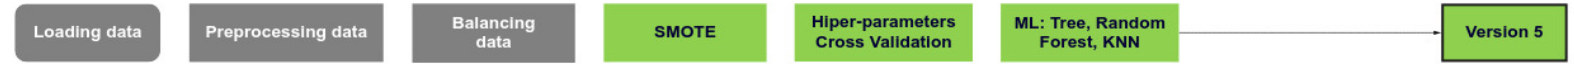

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree     import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.metrics         import accuracy_score, classification_report, confusion_matrix, recall_score
from yellowbrick.classifier  import ConfusionMatrix

In [2]:
with open("data_balanced_smote.pkl", 'rb') as f:
    x_train, x_test, y_train, y_test = pickle.load(f)

<IPython.core.display.Javascript object>

In [3]:
x_train.shape, y_train.shape

((34992, 23), (34992,))

In [4]:
x_test.shape, y_test.shape

((7500, 23), (7500,))

In [5]:
x_test.shape, y_test.shape

((7500, 23), (7500,))

In [6]:
x_train.head()

,LIMIT_BAL,GENDER,EDUCATION,MARITAL STATUS,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,130000,2.0,1.0,2.0,27,0.0,0.0,0.0,0.0,0.0,...,29710,34310,21900,780,2000,2000,5000,438,780,0
1,130000,2.0,3.0,1.0,53,0.0,0.0,0.0,0.0,0.0,...,22386,24296,25436,27451,2343,2386,2296,1536,2451,2659
2,140000,1.0,3.0,1.0,38,2.0,2.0,2.0,2.0,2.0,...,127701,135551,135859,134687,22500,0,10000,2600,2300,5300
3,270000,2.0,2.0,1.0,33,-1.0,-1.0,-1.0,-1.0,-1.0,...,3567,1556,7952,10794,8874,3567,1556,7952,4000,2000
4,220000,2.0,2.0,1.0,53,2.0,0.0,0.0,0.0,0.0,...,223193,215040,210884,210479,8490,8100,8000,7804,8254,6640


# MACHINE LEARNING

In [7]:
version5_accuracy = [] # version5 = [tree, random_forest, knn] for accuracy
version5_recall = [] # version5 = [tree, random_forest, knn] for recall

# Decision Tree

In [8]:
parametros = {'criterion':['gini', 'entropy'], 'splitter': ['best', 'random'],
              'max_depth':[2, 4, 6, 8, 10, 12, 15], 'min_samples_split':[2, 4, 6, 8],
              'min_samples_leaf':[1, 3, 5, 7, 9]}

In [9]:
grid = RandomizedSearchCV(estimator=DecisionTreeClassifier(), param_distributions= parametros)
grid_result = grid.fit(x_train, y_train)
print(grid_result.best_score_)
print(grid_result.best_params_)

0.8333964256764561
{'splitter': 'best', 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_depth': 10, 'criterion': 'entropy'}


In [10]:
parametros_tree = grid_result.best_params_

tree = DecisionTreeClassifier(**parametros_tree)
tree.fit(x_train, y_train)
v5_tree = tree.predict(x_test)

In [11]:
version5_accuracy.append( accuracy_score(y_test, v5_tree) )
version5_recall.append( recall_score(y_test, v5_tree, pos_label='1') )

In [12]:
version5_accuracy

[0.8022666666666667]

In [13]:
version5_recall

[0.44730392156862747]

In [14]:
cf_tree = confusion_matrix(y_test, v5_tree)

In [15]:
print(classification_report(y_test, v5_tree))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      5868
           1       0.56      0.45      0.50      1632

    accuracy                           0.80      7500
   macro avg       0.71      0.67      0.69      7500
weighted avg       0.79      0.80      0.79      7500



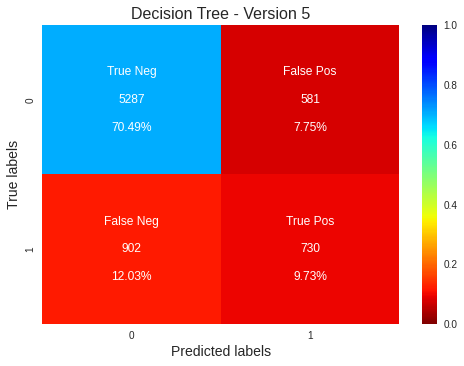

In [16]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

group_counts = ["{:0.0f}".format(value) for value in cf_tree.flatten()]

group_percentage = ["{0:0.2%}".format(value) for value in cf_tree.flatten()/np.sum(cf_tree)]

labels = [f"{v1}\n\n{v2}\n\n{v3}" for v1,v2,v3 in zip(group_names, group_counts, group_percentage)]

labels = np.asarray(labels).reshape(2,2)

ax = plt.subplot()



sns.heatmap(cf_tree/np.sum(cf_tree), annot=labels, fmt='', cmap = 'jet_r', vmin = 0, vmax = 1, ax = ax)

ax.set_xlabel('Predicted labels', fontsize = 14)
ax.set_ylabel('True labels', fontsize = 14)

plt.title("Decision Tree - Version 5", fontsize = 16)

plt.show()

# Random Forest

In [17]:
parametros = {'n_estimators':[75, 100, 125, 150], 'criterion': ['gini', 'entropy'],
              'max_depth':[2, 4, 6, 8, 10, 15], 'min_samples_split':[2, 4, 6, 8, 10],
             'min_samples_leaf': [1, 3, 5, 7, 9]}

In [18]:
grid = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions= parametros)
grid_result = grid.fit(x_train, y_train)
print(grid_result.best_score_)
print(grid_result.best_params_)

0.8604321990880909
{'n_estimators': 75, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 15, 'criterion': 'entropy'}


In [19]:
parametros_rf = grid_result.best_params_

rf = RandomForestClassifier(**parametros_rf)
rf.fit(x_train, y_train)

v5_rf = rf.predict(x_test)

In [20]:
version5_accuracy.append(accuracy_score(y_test, v5_rf))
version5_recall.append(recall_score(y_test, v5_rf, pos_label='1'))

In [21]:
print(classification_report(y_test, v5_rf))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      5868
           1       0.61      0.40      0.49      1632

    accuracy                           0.82      7500
   macro avg       0.73      0.67      0.69      7500
weighted avg       0.80      0.82      0.80      7500



In [22]:
cf_rf = confusion_matrix(y_test, v5_rf)

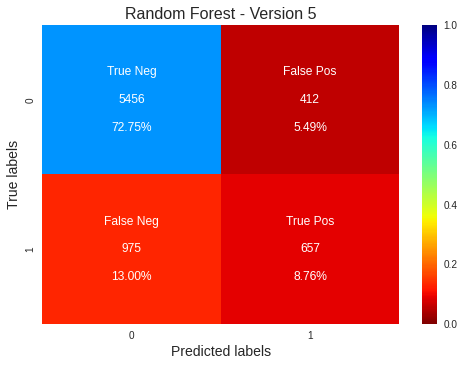

In [23]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

group_counts = ["{:0.0f}".format(value) for value in cf_rf.flatten()]

group_percentage = ["{0:0.2%}".format(value) for value in cf_rf.flatten()/np.sum(cf_rf)]

labels = [f"{v1}\n\n{v2}\n\n{v3}" for v1,v2,v3 in zip(group_names, group_counts, group_percentage)]

labels = np.asarray(labels).reshape(2,2)

ax = plt.subplot()



sns.heatmap(cf_rf/np.sum(cf_rf), annot=labels, fmt='', cmap = 'jet_r', vmin = 0, vmax = 1, ax = ax)

ax.set_xlabel('Predicted labels', fontsize = 14)
ax.set_ylabel('True labels', fontsize = 14)

plt.title("Random Forest - Version 5", fontsize = 16)

plt.show()

# KNN

In [24]:
parametros = {'n_neighbors':[2, 3, 4, 5, 6, 7, 8, 10, 12], 'weights':['uniform', 'distance'],
             'algorithm':['ball_tree', 'kd_tree', 'brute', 'auto']}

In [25]:
grid = RandomizedSearchCV(estimator=KNeighborsClassifier(), param_distributions=parametros)
grid_result = grid.fit(x_train, y_train)
print(grid_result.best_score_)
print(grid_result.best_params_)

0.8206452389536233
{'weights': 'distance', 'n_neighbors': 2, 'algorithm': 'ball_tree'}


In [26]:
parametros_knn = grid_result.best_params_
knn = KNeighborsClassifier(**parametros_knn)
knn.fit(x_train, y_train)
v5_knn = knn.predict(x_test)

In [27]:
version5_accuracy.append(accuracy_score(y_test, v5_knn))
version5_recall.append(recall_score(y_test, v5_knn, pos_label = '1'))

In [28]:
print(classification_report(y_test, v5_knn))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77      5868
           1       0.29      0.38      0.33      1632

    accuracy                           0.66      7500
   macro avg       0.55      0.56      0.55      7500
weighted avg       0.70      0.66      0.68      7500



In [29]:
cf_knn = confusion_matrix(y_test, v5_knn)

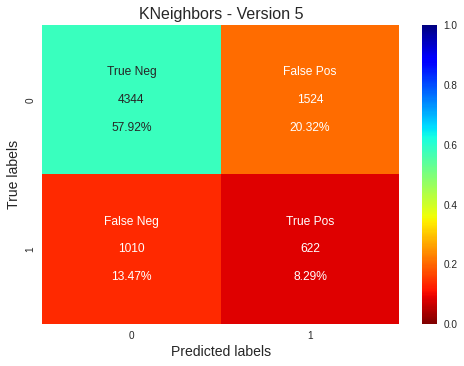

In [30]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

group_counts = ["{:0.0f}".format(value) for value in cf_knn.flatten()]

group_percentage = ["{0:0.2%}".format(value) for value in cf_knn.flatten()/np.sum(cf_knn)]

labels = [f"{v1}\n\n{v2}\n\n{v3}" for v1,v2,v3 in zip(group_names, group_counts, group_percentage)]

labels = np.asarray(labels).reshape(2,2)

ax = plt.subplot()



sns.heatmap(cf_knn/np.sum(cf_knn), annot=labels, fmt='', cmap = 'jet_r', vmin = 0, vmax = 1, ax = ax)

ax.set_xlabel('Predicted labels', fontsize = 14)
ax.set_ylabel('True labels', fontsize = 14)

plt.title("KNeighbors - Version 5", fontsize = 16)

plt.show()

# Cross Validation

In [31]:
from sklearn.metrics import precision_score, make_scorer

custom_scorer = make_scorer(recall_score, pos_label="1")

#import warnings
#warnings.filterwarnings('ignore')

resultados_tree_accuracy = []
resultados_random_accuracy = []
resultados_knn_accuracy = []

resultados_tree_recall = []
resultados_random_recall = []
resultados_knn_recall = []



for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    
    tree = DecisionTreeClassifier(**parametros_tree)
    
    scores = cross_val_score(tree, x_train, y_train, scoring=custom_scorer, cv = kfold)
    resultados_tree_recall.append(scores.mean())
    
    scores = cross_val_score(tree, x_train, y_train, scoring='accuracy', cv = kfold)
    resultados_tree_accuracy.append(scores.mean())
    
    print('Tree - Stage: {}'.format(i))
    
    # ==================================================================
        
    rf = RandomForestClassifier(**parametros_rf)
    
    scores = cross_val_score(rf, x_train, y_train,scoring = custom_scorer, cv=kfold)
    resultados_random_recall.append(scores.mean())
    
    scores = cross_val_score(rf, x_train, y_train,scoring = 'accuracy', cv=kfold)
    resultados_random_accuracy.append(scores.mean())
    
    print('Random Forest - Stage: {}'.format(i))
    #===================================================================
    
    knn = KNeighborsClassifier(**parametros_knn)
    
    scores = cross_val_score(knn, x_train, y_train, scoring=custom_scorer, cv=kfold)
    resultados_knn_recall.append(scores.mean())
    
    scores = cross_val_score(knn, x_train, y_train, scoring='accuracy', cv=kfold)
    resultados_knn_accuracy.append(scores.mean())
    
    
    #===================================================================
    print('KNN - Stage: {}'.format(i))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 3


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 3


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 3


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 6


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 6


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 6


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 7


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 7


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 7


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 8


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 8


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 8


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 9


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 9


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 9


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 10


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 10


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 10


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 11


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 11


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 11


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 12


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 12


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 12


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 13


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 13


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 13


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 14


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 14


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 14


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 15


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 15


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 15


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 16


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 16


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 16


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 17


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 17


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 17


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 18


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 18


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 18


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 19


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 19


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 19


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 20


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 20


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 20


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 21


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 21


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 21


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 22


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 22


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 22


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 23


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 23


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 23


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 24


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 24


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 24


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 25


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 25


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 25


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 26


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 26


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 26


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 27


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 27


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 27


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 28


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 28


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 28


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tree - Stage: 29


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest - Stage: 29


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN - Stage: 29


In [32]:
resultados_accuracy = pd.DataFrame({'Decision Tree': resultados_tree_accuracy, 
                           'Random Forest': resultados_random_accuracy,
                          'KNN': resultados_knn_accuracy})

resultados_recall = pd.DataFrame({'Decision Tree': resultados_tree_recall, 
                           'Random Forest': resultados_random_recall,
                          'KNN': resultados_knn_recall})

In [33]:
resultados_accuracy.to_csv("resultados_accuracy_version5.csv")
resultados_recall.to_csv("resultados_recall_version5.csv")

In [34]:
resultados_accuracy.head(7)

,Decision Tree,Random Forest,KNN
0,0.844164,0.874000,0.827818
1,0.846451,0.874429,0.826417
2,0.843079,0.873771,0.826218
3,0.842021,0.875114,0.825103
4,0.846622,0.874257,0.827503
5,0.846307,0.875114,0.825875
6,0.841706,0.874914,0.827446


In [35]:
resultados_recall

,Decision Tree,Random Forest,KNN
0,0.781276,0.821934,0.936688
1,0.779537,0.822161,0.936376
2,0.777040,0.821969,0.936763
3,0.773940,0.822852,0.935305
4,0.775048,0.823575,0.937823
5,0.780139,0.822523,0.934502
6,0.773738,0.820440,0.935639
7,0.777381,0.823723,0.935827
8,0.779938,0.820686,0.936730
9,0.776210,0.822774,0.937339


# Saving and storaging the results

In [55]:
accuracy_list = []
recall_list = []

for i in range(len(resultados_accuracy.columns)):
    accuracy_list.append( resultados_accuracy[ resultados_accuracy.columns[i] ].mean() )
    recall_list.append( resultados_recall[ resultados_recall.columns[i] ].mean() )

In [56]:
resultados_accuracy.mean()

Decision Tree    0.843486
Random Forest    0.874799
KNN              0.826992
dtype: float64

In [57]:
accuracy_list

[0.8434861293702964, 0.8747989534424803, 0.8269918942827201]

In [58]:
recall_list

[0.7776912251294379, 0.822275592182246, 0.9362206791003342]

In [59]:
accuracy = pd.read_csv('accuracy_versions.csv')
recall = pd.read_csv("recall_versions.csv")

accuracy

,Algorithms,Version 1,Version 2,Version 3,Version 4,Version 5,Version 6
0,Decision Tree,0.733600,0.818782,0.721333,0.627600,0.843486,0.695034
1,Random Forest,0.819067,0.817401,0.814667,0.750667,0.874799,0.710658
2,KNN,0.762133,0.770861,0.607467,0.578533,0.826992,0.606901


In [60]:
recall

,Algorithms,Version 1,Version 2,Version 3,Version 4,Version 5,Version 6
0,Decision Tree,0.409314,0.358220,0.411152,0.611520,0.777691,0.561127
1,Random Forest,0.368260,0.359337,0.395833,0.619485,0.822276,0.621627
2,KNN,0.194240,0.097050,0.530025,0.590686,0.936221,0.658990


In [61]:
accuracy['Version 5'] = accuracy_list
recall['Version 5'] = recall_list

In [62]:
recall_list

[0.7776912251294379, 0.822275592182246, 0.9362206791003342]

In [63]:
accuracy

,Algorithms,Version 1,Version 2,Version 3,Version 4,Version 5,Version 6
0,Decision Tree,0.733600,0.818782,0.721333,0.627600,0.843486,0.695034
1,Random Forest,0.819067,0.817401,0.814667,0.750667,0.874799,0.710658
2,KNN,0.762133,0.770861,0.607467,0.578533,0.826992,0.606901


In [64]:
recall

,Algorithms,Version 1,Version 2,Version 3,Version 4,Version 5,Version 6
0,Decision Tree,0.409314,0.358220,0.411152,0.611520,0.777691,0.561127
1,Random Forest,0.368260,0.359337,0.395833,0.619485,0.822276,0.621627
2,KNN,0.194240,0.097050,0.530025,0.590686,0.936221,0.658990


In [65]:
accuracy.to_csv("accuracy_versions.csv", index=None)

recall.to_csv("recall_versions.csv", index = None)